In [25]:
import pandas as pd

In [26]:
df=pd.read_csv('../data/raw/Amazon Sale Report.csv')
df.tail()

C:\Users\adhik\AppData\Local\Temp\ipykernel_14372\77595702.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/raw/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [27]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [28]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

fulfilled-by          69.546811
promotion-ids         38.110487
Unnamed: 22           38.030626
currency               6.043807
Amount                 6.043807
Courier Status         5.328164
ship-country           0.025586
ship-city              0.025586
ship-state             0.025586
ship-postal-code       0.025586
Sales Channel          0.000000
Fulfilment             0.000000
Status                 0.000000
Date                   0.000000
Order ID               0.000000
index                  0.000000
Style                  0.000000
ship-service-level     0.000000
Qty                    0.000000
ASIN                   0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
B2B                    0.000000
dtype: float64

In [29]:
df.drop(columns=['fulfilled-by','promotion-ids','Unnamed: 22'],inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [31]:
df.dropna(subset=['Amount'],inplace=True)


In [32]:
df['Courier Status']=df['Courier Status'].fillna('unknown')

In [33]:
df.dropna(inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121149 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121149 non-null  int64  
 1   Order ID            121149 non-null  object 
 2   Date                121149 non-null  object 
 3   Status              121149 non-null  object 
 4   Fulfilment          121149 non-null  object 
 5   Sales Channel       121149 non-null  object 
 6   ship-service-level  121149 non-null  object 
 7   Style               121149 non-null  object 
 8   SKU                 121149 non-null  object 
 9   Category            121149 non-null  object 
 10  Size                121149 non-null  object 
 11  ASIN                121149 non-null  object 
 12  Courier Status      121149 non-null  object 
 13  Qty                 121149 non-null  int64  
 14  currency            121149 non-null  object 
 15  Amount              121149 non-null  fl

In [35]:
df['Date']=pd.to_datetime(df['Date'])


C:\Users\adhik\AppData\Local\Temp\ipykernel_14372\772075079.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [36]:
df['ship-postal-code']=df['ship-postal-code'].astype(int).astype(str)


In [37]:
for col in ['Status', 'Fulfilment', 'Category']:
    df[col] = df[col].astype('category')

In [39]:
df.isna().sum() 

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [40]:
df['Sales Channel ']=df['Sales Channel '].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121149 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121149 non-null  int64         
 1   Order ID            121149 non-null  object        
 2   Date                121149 non-null  datetime64[ns]
 3   Status              121149 non-null  category      
 4   Fulfilment          121149 non-null  category      
 5   Sales Channel       121149 non-null  category      
 6   ship-service-level  121149 non-null  object        
 7   Style               121149 non-null  object        
 8   SKU                 121149 non-null  object        
 9   Category            121149 non-null  category      
 10  Size                121149 non-null  object        
 11  ASIN                121149 non-null  object        
 12  Courier Status      121149 non-null  object        
 13  Qty                 121149 non-nul

C:\Users\adhik\AppData\Local\Temp\ipykernel_14372\3967503022.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Amount'].resample('M').sum()


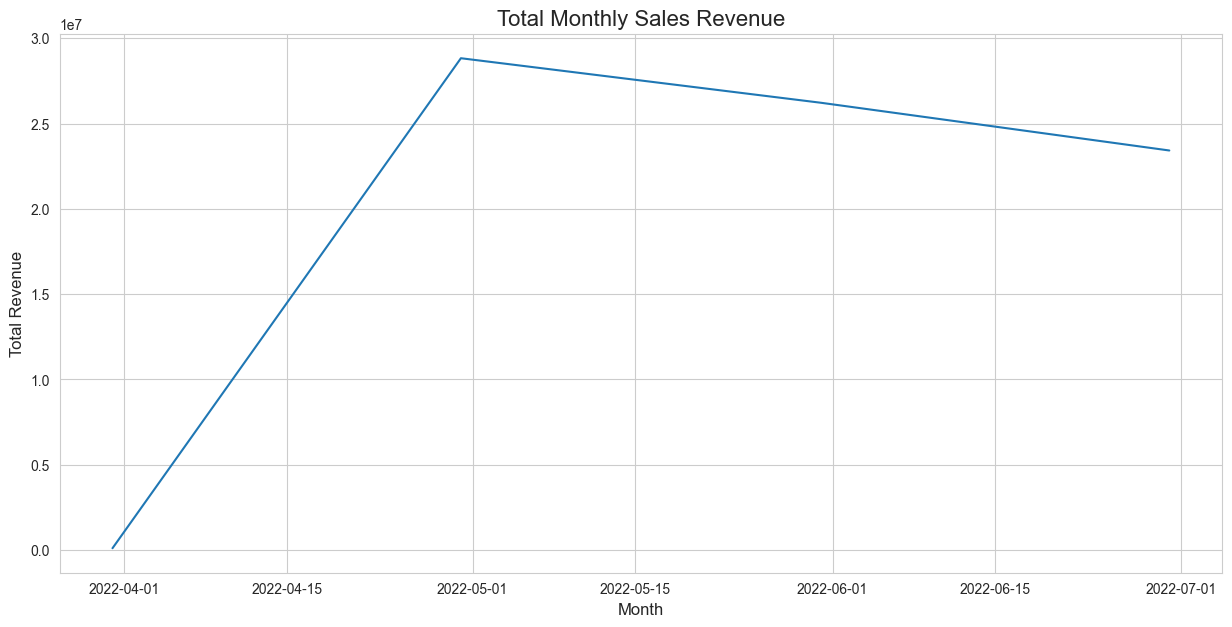

In [42]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style("whitegrid")

# --- Analyze Sales Trend Over Time ---

# To analyze time series data, it's best to set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data by month ('M') and sum the 'Amount' for each month to get monthly revenue
monthly_sales = df['Amount'].resample('M').sum()

# Create the plot
plt.figure(figsize=(15, 7)) # Set the figure size to make it wide and easy to read
sns.lineplot(data=monthly_sales)

# Add a title and labels for clarity
plt.title('Total Monthly Sales Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Display the plot
plt.show()

Massive Initial Growth: The sales ramp up incredibly fast from nearly zero in April 2022 to a huge peak around the beginning of May 2022. This might represent a new store opening, a product launch, or the start of the dataset.
Peak Performance in May: The business had its best month in May, hitting a peak revenue of approximately 27 million (the y-axis 1e7 means 10 million, so 2.7 on the axis is 27 million).
A Worrying Decline: After the peak in May, sales revenue begins to trend downwards through June and into July.

"Why are our sales declining?"


 What are our top-selling product categories?
 

Top 10 Product Categories by Revenue:


C:\Users\adhik\AppData\Local\Temp\ipykernel_14372\1915527556.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_performance = df.groupby('Category').agg(


,Total_Revenue,Total_Quantity_Sold
Category,,
Set,39195176.03,45214
kurta,21291538.70,44956
Western Dress,11215337.69,13938
Top,5346812.30,9897
Ethnic Dress,791217.66,1053
Blouse,458408.18,844
Bottom,150667.98,397
Saree,123933.76,152
Dupatta,915.00,3


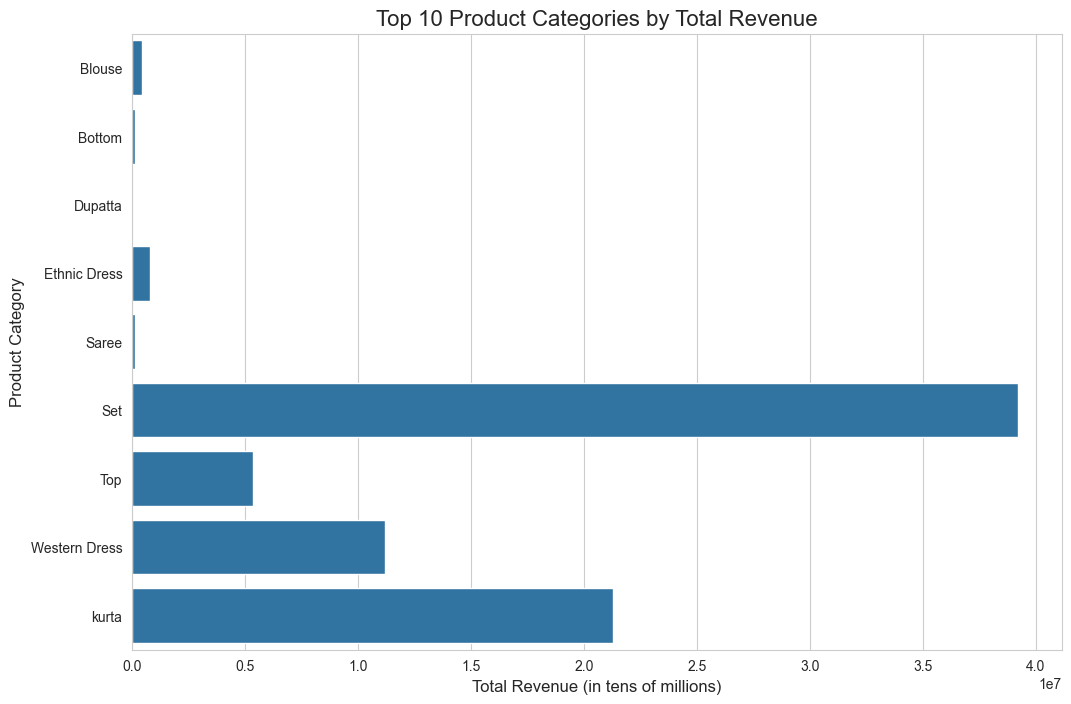

In [44]:
# --- Analyze Top Product Categories ---

# First, we need to reset the index so 'Date' becomes a regular column again
# This makes it easier to group by other columns.
df.reset_index(inplace=True)

# Group the data by the 'Category' column.
# For each category, calculate the sum of 'Amount' and the sum of 'Qty'.
category_performance = df.groupby('Category').agg(
    Total_Revenue=('Amount', 'sum'),
    Total_Quantity_Sold=('Qty', 'sum')
).sort_values(by='Total_Revenue', ascending=False) # Sort to see the best categories at the top

# Display the top 10 categories as a table
print("Top 10 Product Categories by Revenue:")
display(category_performance.head(10))

# Create a bar chart to visualize the revenue from the top 10 categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Revenue', y=category_performance.index[:10], data=category_performance.head(10), orient='h')

# Add titles and labels
plt.title('Top 10 Product Categories by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue (in tens of millions)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Display the plot
plt.show()

Analyzing our top 3 categories: ['Set', 'kurta', 'Western Dress']


C:\Users\adhik\AppData\Local\Temp\ipykernel_14372\669395365.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_top3 = df_top3.groupby('Category')['Amount'].resample('M').sum()
C:\Users\adhik\AppData\Local\Temp\ipykernel_14372\669395365.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_top3 = df_top3.groupby('Category')['Amount'].resample('M').sum()


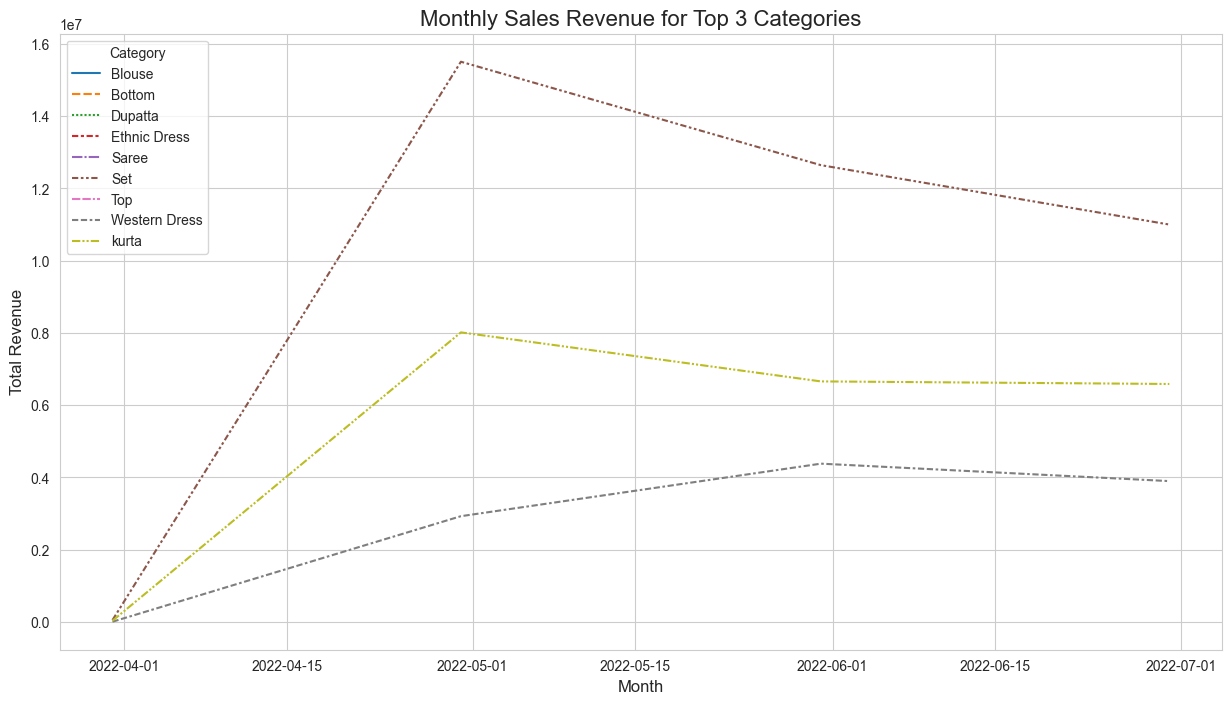


Monthly Revenue Data for Top 3 Categories:


Category,Set,Western Dress,kurta
Date,,,
2022-03-31,53884.00,7653.28,34256.57
2022-04-30,15502956.56,2927780.51,8013898.48
2022-05-31,12640967.35,4381304.41,6657168.62
2022-06-30,10997368.12,3898599.49,6586215.03


In [45]:
# --- Analyze Monthly Trends for Top 3 Categories ---

# First, let's identify our top 3 categories from the previous step
top_3_categories = category_performance.head(3).index.tolist()
print(f"Analyzing our top 3 categories: {top_3_categories}")

# Filter the original DataFrame to only include data from these top 3 categories
df_top3 = df[df['Category'].isin(top_3_categories)].copy()

# Now, we'll group by both the month AND the category to get monthly sales for each
# We need to set 'Date' as the index again for resampling
df_top3.set_index('Date', inplace=True)
monthly_sales_top3 = df_top3.groupby('Category')['Amount'].resample('M').sum()

# The result is a multi-index Series, let's unstack it to make it easy to plot
monthly_sales_top3_df = monthly_sales_top3.unstack(level=0)

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_sales_top3_df)

# Add titles and labels
plt.title('Monthly Sales Revenue for Top 3 Categories', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Category')

# Display the plot
plt.show()

# Display the data table as well for exact numbers
print("\nMonthly Revenue Data for Top 3 Categories:")
display(monthly_sales_top3_df)